In [104]:
from sklearn import datasets

diabetes = datasets.load_diabetes(as_frame=True)
print(diabetes['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [105]:
X=diabetes['data']
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


In [106]:
y=diabetes['target']
y

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

In [107]:
def evalmetric(y,ypred):
 from scipy.stats import pearsonr
 import numpy as np
 e = y - ypred
 mse_f = np.mean(e**2)
 rmse_f = np.sqrt(mse_f)
 mae_f = np.mean(abs(e))
 mape_f = 100*np.mean(abs(e/y))
 crl, _ = pearsonr(y, ypred)
 r2_f = crl*crl
 print("MSE:", mse_f)
 print("RMSE:", rmse_f)
 print("MAE:",mae_f)
 print("MAPE:",mape_f)
 print("R-Squared:", round(r2_f, 4))


In [108]:
#Note: You can use ChatGPT or notebooks used in the class to find the answers to the questions
#1.Get the correlation between X variables and y variables.(5 pt)
X.corrwith(y)

age    0.187889
sex    0.043062
bmi    0.586450
bp     0.441482
s1     0.212022
s2     0.174054
s3    -0.394789
s4     0.430453
s5     0.565883
s6     0.382483
dtype: float64

In [109]:
#2.Split the data into train and test using %25 percent of data(5 pt)
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
X=diabetes.data
y=diabetes.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (331, 10)
y_train shape: (331,)
X_test shape: (111, 10)
y_test shape: (111,)


In [110]:
#3 Using Decision Tree and Random Forecast, get the evaluation scores on test and training data?
#Pick one of the metric such as MAPE and
#explain briefly why decision tree perform better in training data although it performs worse on test data (15 pt)
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
decision_tree = DecisionTreeRegressor(random_state=5)
decision_tree.fit(X_train, y_train)
print('Decision Tree, Train Data')
y_pred = decision_tree.predict(X_train)
evalmetric(y_train,y_pred)
print('Decision Tree, Test Data')
y_pred2 = decision_tree.predict(X_test)
evalmetric(y_test,y_pred2)
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=5)
rfr.fit(X_train,y_train)
## Predicting for training data
print('Random Forest, Train Data')
y_pred = rfr.predict(X_train)
evalmetric(y_train,y_pred)
print('Random Forest, Test Data')
y_pred2 = rfr.predict(X_test)
evalmetric(y_test,y_pred2)
decision_tree_train_score = decision_tree.score(X_train, y_train)
decision_tree_test_score = decision_tree.score(X_test, y_test)
random_forest_train_score = rfr.score(X_train, y_train)
random_forest_test_score = rfr.score(X_test, y_test)
print("Decision Tree:")
print("- Train score:", decision_tree_train_score)
print("- Test score:", decision_tree_test_score)
print("Random Forest:")
print("- Train score:", random_forest_train_score)
print("- Test score:", random_forest_test_score)

Decision Tree, Train Data
MSE: 0.0
RMSE: 0.0
MAE: 0.0
MAPE: 0.0
R-Squared: 1.0
Decision Tree, Test Data
MSE: 5893.8378378378375
RMSE: 76.77133474049958
MAE: 56.34234234234234
MAPE: 50.76192637873041
R-Squared: 0.25
Random Forest, Train Data
MSE: 488.4564909365559
RMSE: 22.101051806114477
MAE: 18.062265861027186
MAPE: 15.880021038343903
R-Squared: 0.9413
Random Forest, Test Data
MSE: 2877.454952252252
RMSE: 53.641914136729426
MAE: 42.626036036036034
MAPE: 39.03694827392077
R-Squared: 0.4821
Decision Tree:
- Train score: 1.0
- Test score: -0.06585324914061563
Random Forest:
- Train score: 0.919191591771536
- Test score: 0.4796353760491432


In [111]:
!pip install catboost

# Question 3 Answer: MAPE in train is zero while on test data it is 50,76. Decision trees are prone to overfitting and thus, they perform better on train data. This happens because they make decisions based on the information that is available at the time, without considering the potential consequences of those decisions.  

In [112]:
#4 Use boosting methods (XGBoost, LightGBM, GradingBoosting Method and CatBoost) to get
# the evaluation scores on test and training data
#Which methods gave  best performance of Boosting technqie on test data based on MAPE metric?
#With this method, Did you get better result from Random Forest on test data based on MAPE metric?(25 pt)
from time import time
from sklearn.ensemble import GradientBoostingRegressor
import catboost as cb
from xgboost import XGBRegressor
xgr = XGBRegressor(random_state=5)
xgr.fit(X_train, y_train)
print('XGBoost, Train Data')
y_pred = xgr.predict(X_train)
evalmetric(y_train,y_pred)
print('XGBoost, Test Data')
y_pred2 = xgr.predict(X_test)
evalmetric(y_test,y_pred2)
gbr = GradientBoostingRegressor(random_state=5)
gbr.fit(X_train, y_train)
print('GradientBoosting, Train Data')
y_pred = gbr.predict(X_train)
evalmetric(y_train,y_pred)
print('GradientBoosting, Test Data')
y_pred2 = gbr.predict(X_test)
evalmetric(y_test,y_pred2)
xgr_train_score = xgr.score(X_train, y_train)
xgr_test_score = xgr.score(X_test, y_test)
gbr_train_score = gbr.score(X_train, y_train)
gbr_test_score = gbr.score(X_test, y_test)
print("XGBoost:")
print("- Train score:", xgr_train_score)
print("- Test score:", xgr_test_score)
print("GradientBoosting:")
print("- Train score:", gbr_train_score)
print("- Test score:", gbr_test_score)

XGBoost, Train Data
MSE: 0.0072347756839096
RMSE: 0.0850574845848947
MAE: 0.0550151836475937
MAPE: 0.050770321389823125
R-Squared: 1.0
XGBoost, Test Data
MSE: 3365.329791300732
RMSE: 58.01146258542989
MAE: 46.585689338477884
MAPE: 39.83706097765448
R-Squared: 0.4213
GradientBoosting, Train Data
MSE: 905.4545327948355
RMSE: 30.09077155532632
MAE: 24.012979082321333
MAPE: 21.32279628984329
R-Squared: 0.8643
GradientBoosting, Test Data
MSE: 3197.033725372624
RMSE: 56.54231800494762
MAE: 44.328836445498844
MAPE: 39.98849858007518
R-Squared: 0.4402
XGBoost:
- Train score: 0.9999988031058697
- Test score: 0.3914071287371097
GradientBoosting:
- Train score: 0.8502050011084776
- Test score: 0.4218421209480361


In [113]:
import catboost as cb
cat = cb.CatBoostRegressor(random_state=5)
cat.fit(X_train, y_train)
print('catboost, Train Data')
y_predcat = cat.predict(X_train)
evalmetric(y_train,y_predcat)
print('catboost, Test Data')
y_predcat2 = xgr.predict(X_test)
evalmetric(y_test,y_predcat2)
cat_train_score = cat.score(X_train, y_train)
cat_test_score = cat.score(X_test, y_test)
print("catboost:")
print("- Train score:", cat_train_score)
print("- Test score:", cat_test_score)

Learning rate set to 0.034381
0:	learn: 76.8395110	total: 2.1ms	remaining: 2.1s
1:	learn: 75.8048950	total: 4.07ms	remaining: 2.03s
2:	learn: 74.7769511	total: 5.69ms	remaining: 1.89s
3:	learn: 73.8646905	total: 7.39ms	remaining: 1.84s
4:	learn: 72.9357724	total: 9.57ms	remaining: 1.9s
5:	learn: 72.0314450	total: 11.5ms	remaining: 1.9s
6:	learn: 71.1652422	total: 12.8ms	remaining: 1.81s
7:	learn: 70.3660606	total: 14.2ms	remaining: 1.76s
8:	learn: 69.6154150	total: 15.5ms	remaining: 1.71s
9:	learn: 68.7983060	total: 17.2ms	remaining: 1.71s
10:	learn: 68.1000121	total: 18.9ms	remaining: 1.7s
11:	learn: 67.4496781	total: 20.5ms	remaining: 1.69s
12:	learn: 66.7893518	total: 22.4ms	remaining: 1.7s
13:	learn: 66.2071361	total: 24ms	remaining: 1.69s
14:	learn: 65.5558989	total: 25.5ms	remaining: 1.68s
15:	learn: 64.9322157	total: 27.1ms	remaining: 1.67s
16:	learn: 64.3780970	total: 28.6ms	remaining: 1.66s
17:	learn: 63.7920687	total: 30.1ms	remaining: 1.64s
18:	learn: 63.2031589	total: 31.6m

In [114]:
import lightgbm as lgb
t0 = time()
lgr = lgb.LGBMRegressor(random_state=17)
lgr.fit(X_train, y_train)
print('LightGBM, Train Data')
y_pred = lgr.predict(X_train)
evalmetric(y_train,y_pred)
print('LightGBM, Test Data')
y_pred2 = lgr.predict(X_test)
evalmetric(y_test,y_pred2)
lightgbm_train_score = lgr.score(X_train, y_train)
lightgbm_test_score = lgr.score(X_test, y_test)
print("LightGBM:")
print("- Train score:", lightgbm_train_score)
print("- Test score:", lightgbm_test_score)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000131 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 569
[LightGBM] [Info] Number of data points in the train set: 331, number of used features: 10
[LightGBM] [Info] Start training from score 154.344411
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

# Question 4 Answer: So, we got following MAPE results on test data: XGBoost 39.837, GradientBoosting 39.988, Catboost 39.837 and LightGBM 39.886. The lower MAPE indicates better performance, implying that XGBoost and Catboost are the winners. Although all of them exhibit similar outcome. Nonetheless, RandomForest provides better results yielding MAPE of 39.037.

In [115]:
#for the other question use following data. Data description is provided below
import pandas as pd
import numpy as np
df = pd.read_csv('https://raw.githubusercontent.com/ogut77/DataScience/main/data/Leads.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

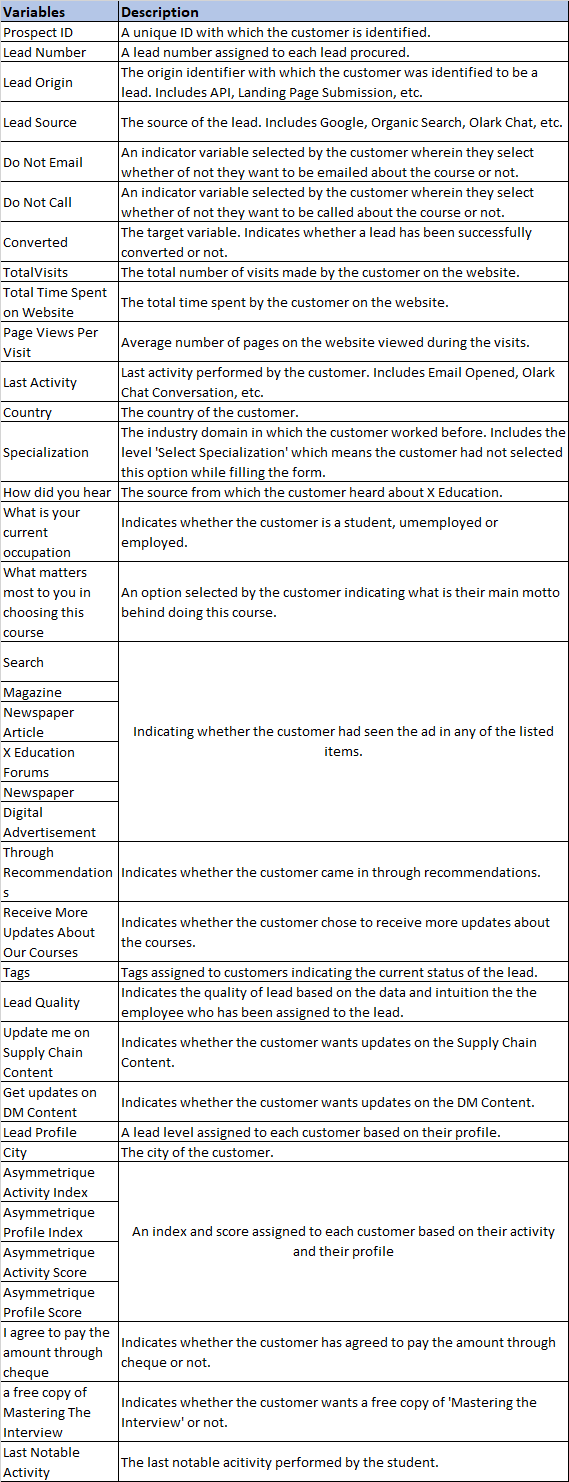

In [118]:
df.isnull().sum()

Prospect ID                                      0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
How did you hear about X Education               0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums             

In [117]:
#Q5 (10 pt) There are missing values in the Lead data .
# Replace missing variables with the mean  if variable is numeric or mode if variable is categorical.
categorical_with_missing = ['Lead Source','Last Activity', 'Country', 'Specialization', 'How did you hear about X Education', 'What is your current occupation', 'What matters most to you in choosing a course', 'Tags', 'Lead Quality', 'Lead Profile','City' , 'Asymmetrique Activity Index', 'Asymmetrique Profile Index'  ]
for col in categorical_with_missing:
    df[col].fillna(value=df[col].mode()[0], inplace=True)
numerical_with_missing=['TotalVisits', 'Page Views Per Visit', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']
for col in numerical_with_missing:
    df[col].fillna(value=df[col].mean(), inplace=True)





In [119]:
#Q6-(10 pt)Convert categorical variables to numerical with label encoder method .
#Drop Prospect ID	Lead Number from the variables and use converted as target variables.
#Split data into train and test using 30% of the data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
  df[col] = le.fit_transform(df[col])
df.drop(['Prospect ID', 'Lead Number'], axis=1, inplace=True)
y=df.Converted
X=df.drop("Converted", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (6468, 34)
Shape of X_test: (2772, 34)
Shape of y_train: (6468,)
Shape of y_test: (2772,)


In [120]:
#Q7(30 pt)Use decison tree, random forest andboosting methods (XGBoost, LightGBM, GradingBoosting Method) to get
# the accuracy scores on test  data
#Which methods gave  best performance on test data based on accuracy metric?
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from time import time
from xgboost import XGBRegressor
import catboost as cb
import lightgbm as lgb
decision_tree = DecisionTreeRegressor(random_state=5)
decision_tree.fit(X_train, y_train)
rfr = RandomForestRegressor(random_state=5)
rfr.fit(X_train,y_train)
xgr = XGBRegressor(random_state=5)
xgr.fit(X_train, y_train)
gbr = GradientBoostingRegressor(random_state=5)
gbr.fit(X_train, y_train)
cat = cb.CatBoostRegressor(random_state=5)
cat.fit(X_train, y_train)
t0 = time()
lgr = lgb.LGBMRegressor(random_state=17)
lgr.fit(X_train, y_train)
decision_tree_train_score = decision_tree.score(X_train, y_train)
decision_tree_test_score = decision_tree.score(X_test, y_test)
random_forest_train_score = rfr.score(X_train, y_train)
random_forest_test_score = rfr.score(X_test, y_test)
lightgbm_train_score = lgr.score(X_train, y_train)
lightgbm_test_score = lgr.score(X_test, y_test)
cat_train_score = cat.score(X_train, y_train)
cat_test_score = cat.score(X_test, y_test)
xgr_train_score = xgr.score(X_train, y_train)
xgr_test_score = xgr.score(X_test, y_test)
gbr_train_score = gbr.score(X_train, y_train)
gbr_test_score = gbr.score(X_test, y_test)
print("Decision Tree:")
print("- Train score:", decision_tree_train_score)
print("- Test score:", decision_tree_test_score)
print("Random Forest:")
print("- Train score:", random_forest_train_score)
print("- Test score:", random_forest_test_score)
print("XGBoost:")
print("- Train score:", xgr_train_score)
print("- Test score:", xgr_test_score)
print("GradientBoosting:")
print("- Train score:", gbr_train_score)
print("- Test score:", gbr_test_score)
print("catboost:")
print("- Train score:", cat_train_score)
print("- Test score:", cat_test_score)
print("LightGBM:")
print("- Train score:", lightgbm_train_score)
print("- Test score:", lightgbm_test_score)

Learning rate set to 0.05499
0:	learn: 0.4730473	total: 2.31ms	remaining: 2.31s
1:	learn: 0.4598530	total: 4.45ms	remaining: 2.22s
2:	learn: 0.4477772	total: 7.01ms	remaining: 2.33s
3:	learn: 0.4370576	total: 9.49ms	remaining: 2.36s
4:	learn: 0.4258023	total: 12ms	remaining: 2.39s
5:	learn: 0.4155345	total: 15.9ms	remaining: 2.63s
6:	learn: 0.4069599	total: 17.9ms	remaining: 2.54s
7:	learn: 0.3988486	total: 20.1ms	remaining: 2.5s
8:	learn: 0.3911976	total: 22.4ms	remaining: 2.46s
9:	learn: 0.3842428	total: 26.9ms	remaining: 2.66s
10:	learn: 0.3777137	total: 32.5ms	remaining: 2.92s
11:	learn: 0.3696877	total: 39.7ms	remaining: 3.27s
12:	learn: 0.3643153	total: 43.8ms	remaining: 3.32s
13:	learn: 0.3583555	total: 46.1ms	remaining: 3.25s
14:	learn: 0.3524376	total: 48.4ms	remaining: 3.17s
15:	learn: 0.3479038	total: 50.6ms	remaining: 3.11s
16:	learn: 0.3441757	total: 54ms	remaining: 3.12s
17:	learn: 0.3400643	total: 56.2ms	remaining: 3.07s
18:	learn: 0.3363681	total: 58.7ms	remaining: 3.03

# Question 7 Answer: According to test scores the best one is catboost method (0.78), the second best is LightGBM (0.7777) and the worst is Decision Tree (0.6147).